In [1]:
from google.colab import drive
drive.mount('/content/drive')
drive_root_dir="./drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
class Article:
  def __init__(self,ID,TITLE,CATEGORY):
    self.id=ID
    self.title=TITLE
    self.category=CATEGORY

In [0]:
drive_colab=drive_root_dir+"/Colab Notebooks"
test_articles=[]
train_articles=[]
valid_articles=[]
with open(drive_colab+"/test.txt") as test, open(drive_colab+"/train.txt") as train, open(drive_colab+"/valid.txt") as valid:
  for line in test.readlines():
    elms=line.split('\t')
    article=Article(elms[0],elms[1],elms[4])
    test_articles.append(article)
  for line in train.readlines():
    elms=line.split('\t')
    article=Article(elms[0],elms[1],elms[4])
    train_articles.append(article)
  for line in valid.readlines():
    elms=line.split('\t')
    article=Article(elms[0],elms[1],elms[4])
    valid_articles.append(article)

In [7]:
!pip install spacy

In [8]:
!pip install gensim

In [0]:
import spacy
import gensim

In [10]:
!rm GoogleNews-vectors-negative300.bin.gz GoogleNews-vectors-negative300.bin
!wget -q https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
!gunzip -n GoogleNews-vectors-negative300.bin.gz

rm: cannot remove 'GoogleNews-vectors-negative300.bin.gz': No such file or directory
rm: cannot remove 'GoogleNews-vectors-negative300.bin': No such file or directory


In [11]:
model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [3]:
!pip install numpy

In [0]:
import numpy as np

In [5]:
!pip install stemming

  Created wheel for stemming: filename=stemming-1.0.1-cp36-none-any.whl size=11139 sha256=9ea09f6a251a519c760ded46f918d0364a2d0e399f5585415590b1052674325a
  Stored in directory: /root/.cache/pip/wheels/e8/05/2e/2ddeb64d4464b854b48323f9676528c17560da7d153db7b0e2
Successfully built stemming


In [0]:
from stemming.porter2 import stem

## 問題70

In [14]:
def create_data(articles):
  cats=[]
  vecs=[]
  for article in articles:
    words=nlp.make_doc(article.title)
    vec=[] 
    for word in words:
      tmp=stem(word.lemma_.lower())
      if tmp in model:
        vec.append(model[tmp])
    vec=np.array(vec)
    vec=np.mean(vec,axis=0)
    if article.category=='b':
      cat=0
    elif article.category=='t':
      cat=1
    elif article.category=='e':
      cat=2
    elif article.category=='m':
      cat=3
    cats.append(cat)
    vecs.append(vec)
  return vecs,cats

train_x=[]
train_y=[]
test_x=[]
test_y=[]
valid_x=[]
valid_y=[]
nlp=spacy.load('en')
train_x,train_y = create_data(train_articles)
test_x,test_y = create_data(test_articles)
valid_x,valid_y = create_data(valid_articles)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [0]:
print(train_y[0])
print(train_x[0])

2
[ 0.01674398  0.02593655 -0.0020006   0.01987033 -0.07628039  0.02746582
  0.02934986 -0.04082574  0.07891846  0.01909044 -0.10150824 -0.14477539
  0.02598063  0.0543891  -0.10061985  0.05054389  0.02968089  0.04136827
 -0.04498969 -0.02448188 -0.05888536  0.07421875  0.08021376 -0.0491511
  0.01045058  0.00535075 -0.15445964  0.06081814  0.03857252 -0.00668844
  0.00761922  0.05213759 -0.0285102  -0.02175225  0.03401693 -0.00785997
  0.00061035  0.1152988   0.05091688  0.08462185  0.07815867 -0.00705295
  0.0803638  -0.03783502  0.02484809 -0.07800378 -0.03815375 -0.04409451
  0.06366306  0.02764214 -0.01350911  0.06863827 -0.00243462  0.00359429
  0.00305854  0.04418945 -0.03768582 -0.01658461  0.01452637 -0.03605143
 -0.07307943  0.07854547 -0.06221517 -0.0338406  -0.00104947 -0.07685004
 -0.06582303  0.0465427  -0.05752563  0.05455187  0.04640028  0.03554959
  0.0626865  -0.01101345 -0.1265191   0.00093587  0.11870829  0.08871799
  0.03603787  0.10325114 -0.00325521 -0.04852803  

## 問題71

In [0]:
def softmax(a):
    a_max = np.max(a)
    x = np.exp(a-a_max)
    u = np.sum(x)
    return x/u

In [0]:
W=np.random.rand(len(train_x[0]),4)
x1=np.matrix(train_x[0])
W=np.matrix(W)
y1=softmax(np.dot(x1,W))[0]
x14=np.matrix(train_x[0:4])
Y=[]
tmp=np.dot(x14,W)
for i in tmp:
  Y.append(softmax(i).tolist()[0])

In [0]:
print(y1[0])
print(Y)

[[0.24284469 0.23785244 0.21174597 0.30755689]]
[[0.24284469477474319, 0.2378524367343321, 0.21174597484433194, 0.3075568936465928], [0.17336179181531028, 0.3535192675974743, 0.1873258885038081, 0.2857930520834073], [0.24339242177157425, 0.3795735293306232, 0.1628849799176224, 0.2141490689801799], [0.21947559044070206, 0.34984648202752006, 0.17740871922557244, 0.2532692083062054]]


## 問題72

In [7]:
!pip3 install torch==1.3.0+cpu torchvision==0.4.1+cpu -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 111.6MB 85kB/s 
     |████████████████████████████████| 13.5MB 330kB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


クロスエントロピー

In [0]:
def cross_entropy(y,ans):
  return -np.log(y[0,ans])

In [30]:
l1=cross_entropy(y1,train_y[0])
l14=0
for i in range(4):
  tmp_x=np.matrix(train_x[i])
  tmp_y=softmax(np.dot(tmp_x,W))[0]
  l14+=cross_entropy(tmp_y,train_y[i])
l14=l14/4
print(l1)
print(l14)

1.3498163973675004
1.3998886030015978


勾配

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [0]:
def torch_softmax(a):
    a_max = torch.max(a)
    x = torch.exp(a-a_max)
    u = torch.sum(x)
    return x/u

def gradient(x,y,weight):
  X = torch.tensor([x])
  W = torch.tensor(weight,requires_grad=True).float()
  print(-torch.log(torch_softmax(torch.mm(X,W))[0,y]))
  calc = -torch.log(torch_softmax(torch.mm(X,W))[0,y])
  calc.backward()
  return W.grad

In [0]:
W = torch.tensor(W,requires_grad=True).float()
print(gradient(train_x[0],train_y[0],W))

tensor(1.5524, grad_fn=<NegBackward>)
tensor([[ 4.0662e-03,  3.9826e-03, -1.3199e-02,  5.1497e-03],
        [ 6.2986e-03,  6.1691e-03, -2.0445e-02,  7.9770e-03],
        [-4.8583e-04, -4.7585e-04,  1.5770e-03, -6.1530e-04],
        ...,
        [ 9.2226e-05,  9.0330e-05, -2.9936e-04,  1.1680e-04],
        [-4.8192e-03, -4.7202e-03,  1.5643e-02, -6.1034e-03],
        [-2.9776e-03, -2.9164e-03,  9.6650e-03, -3.7710e-03]])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


koyamaさんのを参考にしました

In [0]:
print(type(train_x[0]))

<class 'numpy.ndarray'>


In [0]:
loss = nn.CrossEntropyLoss()
tmp = torch.tensor([train_x[0].tolist()])
W = torch.tensor(W,requires_grad=True).float()
tmp2 = torch.tensor([train_y[0]])
calc = loss(torch.mm(tmp, W), tmp2)
calc.backward()
print(W.grad)

tensor([[ 4.0662e-03,  3.9826e-03, -1.3199e-02,  5.1497e-03],
        [ 6.2986e-03,  6.1691e-03, -2.0445e-02,  7.9770e-03],
        [-4.8583e-04, -4.7585e-04,  1.5770e-03, -6.1530e-04],
        ...,
        [ 9.2226e-05,  9.0330e-05, -2.9936e-04,  1.1680e-04],
        [-4.8192e-03, -4.7202e-03,  1.5643e-02, -6.1034e-03],
        [-2.9776e-03, -2.9164e-03,  9.6650e-03, -3.7710e-03]])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
loss = nn.CrossEntropyLoss()
tmp = torch.tensor(train_x[:4])
W = torch.tensor(W,requires_grad=True).float()
tmp2 = torch.tensor(train_y[:4])
calc = loss(torch.mm(tmp, W), tmp2)
print(calc)
calc.backward()
print(W.grad)

tensor(1.5924, grad_fn=<NllLossBackward>)
tensor([[ 0.0162, -0.0007, -0.0169,  0.0014],
        [-0.0019, -0.0027,  0.0059, -0.0013],
        [ 0.0038, -0.0036,  0.0020, -0.0022],
        ...,
        [-0.0132, -0.0005,  0.0149, -0.0012],
        [ 0.0016, -0.0028,  0.0040, -0.0028],
        [-0.0062,  0.0079, -0.0067,  0.0049]])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


## 問題73

In [0]:
import torch.optim as optim

In [0]:
W = np.random.rand(len(train_x[0]),4)
W = np.matrix(W)
loss = nn.CrossEntropyLoss()
W = torch.tensor(W, dtype=torch.float, requires_grad=True)
op = optim.SGD([W],lr=0.1)
tmp_train_x = torch.tensor(train_x)
tmp_train_y = torch.tensor(train_y)
for epoch in range(10000):
  calc_train = loss(torch.mm(tmp_train_x, W), tmp_train_y)
  op.zero_grad()
  calc_train.backward()
  op.step()


## 問題74

In [0]:
def predict(x,weight):
  X = torch.tensor([x])
  W = torch.tensor(weight,requires_grad=True).float()
  preds=torch_softmax(torch.mm(X,W))[0]
  max_i=0
  max_pred=0
  for i,pred in enumerate(preds):
    if max_pred<pred:
      max_i=i
      max_pred=pred
  return max_i
def calc_accuracy(x,y,weight):
  count=0
  for i in range(len(x)):
    pre = predict(x[i],weight)
    if y[i] == pre:
      count+=1
  return count/len(x)

In [0]:
print(calc_accuracy(train_x,train_y,W))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


0.8465138043986897


In [0]:
count=0
print(calc_accuracy(test_x,test_y,W))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


0.850936329588015


## 問題75

In [0]:
W=np.random.rand(len(train_x[0]),4)
W=np.matrix(W)
loss = nn.CrossEntropyLoss()
W = torch.tensor(W, dtype=torch.float, requires_grad=True)
op = optim.SGD([W],lr=0.1)
train_loss=[]
train_accuracy=[]
test_loss=[]
test_accuracy=[]
tmp_test_x = torch.tensor(test_x)
tmp_test_y = torch.tensor(test_y)
for epoch in range(1000):
  calc_train = loss(torch.mm(tmp_train_x, W), tmp_train_y)
  calc_test = loss(torch.mm(tmp_test_x, W), tmp_test_y)
  train_loss.append(calc_train.item())
  test_loss.append(calc_test.item())
  train_accuracy.append(calc_accuracy(train_x,train_y,W))
  test_accuracy.append(calc_accuracy(test_x,test_y,W))
  op.zero_grad()
  calc_train.backward()
  op.step()
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
!pip install matplotlib

In [0]:
import matplotlib.pyplot as plt

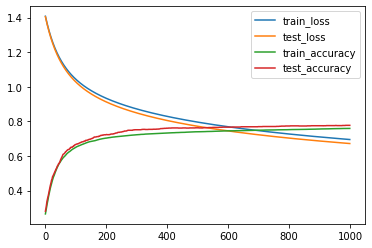

In [0]:
epochs = range(len(train_loss))
plt.plot(epochs,train_loss, label="train_loss")
plt.plot(epochs,test_loss, label="test_loss")
plt.plot(epochs,train_accuracy, label="train_accuracy")
plt.plot(epochs,test_accuracy, label="test_accuracy")
plt.legend()
plt.show()

## 問題76

In [0]:
W=np.random.rand(len(train_x[0]),4)
W=np.matrix(W)
loss = nn.CrossEntropyLoss()
W = torch.tensor(W, dtype=torch.float, requires_grad=True)
op = optim.SGD([W],lr=0.1)
epoch_datas=[]
tmp_test_x = torch.tensor(test_x)
tmp_test_y = torch.tensor(test_y)
with open(drive_root_dir+"/Colab Notebooks/nlp76.txt",'w') as f:
  for epoch in range(1000):
    f.write("#{}#\n".format(epoch))
    f.write(str(W))
    f.write("\n")
    f.write(str(op.param_groups))
    f.write("\n")
    calc_train = loss(torch.mm(tmp_train_x, W), tmp_train_y)
    op.zero_grad()
    calc_train.backward()
    op.step()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


In [0]:
with open(drive_root_dir+"/Colab Notebooks/nlp76.txt",'r') as f:
  for i in range(50):
    print(f.readline(),end="")

#0#
tensor([[0.7614, 0.7507, 0.1989, 0.7326],
        [0.1791, 0.1124, 0.8847, 0.5423],
        [0.1891, 0.0270, 0.0891, 0.0563],
        ...,
        [0.7948, 0.9030, 0.4384, 0.5296],
        [0.8746, 0.0587, 0.6500, 0.2643],
        [0.7781, 0.7099, 0.2080, 0.8880]], requires_grad=True)
[{'params': [tensor([[0.7614, 0.7507, 0.1989, 0.7326],
        [0.1791, 0.1124, 0.8847, 0.5423],
        [0.1891, 0.0270, 0.0891, 0.0563],
        ...,
        [0.7948, 0.9030, 0.4384, 0.5296],
        [0.8746, 0.0587, 0.6500, 0.2643],
        [0.7781, 0.7099, 0.2080, 0.8880]], requires_grad=True)], 'lr': 0.1, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False}]
#1#
tensor([[0.7612, 0.7508, 0.1989, 0.7328],
        [0.1794, 0.1122, 0.8851, 0.5418],
        [0.1887, 0.0271, 0.0894, 0.0564],
        ...,
        [0.7950, 0.9033, 0.4371, 0.5305],
        [0.8748, 0.0586, 0.6497, 0.2645],
        [0.7768, 0.7098, 0.2089, 0.8884]], requires_grad=True)
[{'params': [tensor([[0.7612, 0.7508, 

## 問題77

https://gotutiyan.hatenablog.com/entry/2020/04/21/182937
を参考にしました

In [0]:
class DataSet:
    def __init__(self,x,y):
        self.X = x # 入力
        self.y = y # 出力

    def __len__(self):
        return len(self.X) # データ数(10)を返す

    def __getitem__(self, index):
        # index番目の入出力ペアを返す
        return self.X[index], self.y[index]

In [0]:
import time
import copy

In [0]:
# さっき作ったDataSetクラスのインスタンスを作成
dataset = DataSet(train_x,train_y)
# datasetをDataLoaderの引数とすることでミニバッチを作成．
W_base=np.random.rand(len(train_x[0]),4)
W_base=np.matrix(W_base)
loss = nn.CrossEntropyLoss()
W = torch.tensor(W, dtype=torch.float, requires_grad=True)
for i in [1,2,4,8,16,32,64,128]:
  print("batch_size:"+str(i))
  W=copy.deepcopy(W_base)
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=i)
  elapsed_time=0
  epoch_count=3
  for epoch in range(epoch_count):
    loss_ave=0
    grad_ave=0
    start=time.time()
    for data_x,data_y in dataloader:
      op = optim.SGD([W],lr=0.1)
      calc_data = loss(torch.mm(data_x, W), data_y)
      loss_ave+=calc_data.item()
      op.zero_grad()
      calc_data.backward()
      grad_ave=torch.add(grad_ave,W.grad)
      op.step()
    elapsed_time += time.time() - start
    loss_ave=loss_ave/len(dataloader)
    grad_ave= grad_ave/len(dataloader)
    print("epoch{} : {} , \n{}".format(epoch, loss_ave, grad_ave))
  elapsed_time=elapsed_time/epoch_count
  print("time:{}".format(elapsed_time))

tensor([[0.6377, 0.7626, 0.5749, 0.3019],
        [0.7771, 0.3224, 0.4686, 0.9605],
        [0.7146, 0.8979, 0.6751, 0.5185],
        ...,
        [0.5577, 0.5065, 0.5407, 0.1637],
        [0.6493, 0.9939, 0.7065, 0.9970],
        [0.6488, 0.4315, 0.8451, 0.5480]], grad_fn=<CopyBackwards>)
tensor([[0.6377, 0.7626, 0.5749, 0.3019],
        [0.7771, 0.3224, 0.4686, 0.9605],
        [0.7146, 0.8979, 0.6751, 0.5185],
        ...,
        [0.5577, 0.5065, 0.5407, 0.1637],
        [0.6493, 0.9939, 0.7065, 0.9970],
        [0.6488, 0.4315, 0.8451, 0.5480]], requires_grad=True)
batch_size:1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


epoch0 : 0.547920393824924 , 
tensor([[ 1.5414e-04, -2.2050e-04,  1.8732e-05,  4.7628e-05],
        [ 2.9822e-04, -1.0868e-04, -1.6968e-04, -1.9863e-05],
        [ 3.1004e-04, -2.1736e-04,  2.8043e-04, -3.7312e-04],
        ...,
        [-7.4140e-04,  6.7128e-04,  6.5467e-04, -5.8455e-04],
        [ 2.2432e-04,  2.6345e-04, -1.2003e-05, -4.7576e-04],
        [ 9.7443e-04,  7.2668e-04, -9.5734e-04, -7.4377e-04]])
epoch1 : 0.43068812484783503 , 
tensor([[-3.9391e-05,  1.1125e-05,  1.1750e-04, -8.9239e-05],
        [ 1.4866e-04, -2.0241e-04, -3.5982e-05,  8.9732e-05],
        [ 2.9594e-05, -2.3067e-04,  3.1331e-04, -1.1224e-04],
        ...,
        [-5.2252e-05,  2.4495e-04, -1.0182e-04, -9.0874e-05],
        [ 2.3750e-04, -1.1014e-04, -1.5745e-04,  3.0094e-05],
        [ 2.1100e-04,  3.0615e-04, -1.1718e-04, -3.9997e-04]])
epoch2 : 0.40535122854651445 , 
tensor([[ 8.7492e-08,  3.1830e-05,  7.1064e-05, -1.0298e-04],
        [ 8.8389e-05, -1.5995e-04, -2.4692e-05,  9.6249e-05],
        [ 

## 問題78
https://qiita.com/elm200/items/46633430c456dd90f1e3
を参考にしました

In [0]:
def try_gpu(e):
    if torch.cuda.is_available():
        return e.cuda()
    return e

In [29]:
# さっき作ったDataSetクラスのインスタンスを作成
dataset = DataSet(train_x,train_y)
# datasetをDataLoaderの引数とすることでミニバッチを作成．
W_base=np.random.rand(len(train_x[0]),4)
W_base=np.matrix(W_base)
loss = nn.CrossEntropyLoss()
W = torch.tensor(W, dtype=torch.float, requires_grad=True)
W_base=try_gpu(W_base)
print(W_base)
for i in [1,2,4,8,16,32,64,128]:
  print("batch_size:"+str(i))
  W=copy.deepcopy(W_base)
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=i)
  elapsed_time=0
  epoch_count=3
  for epoch in range(epoch_count):
    loss_ave=0
    grad_ave=0
    start=time.time()
    for data_x,data_y in dataloader:
      data_x_gpu=try_gpu(data_x)
      data_y_gpu=try_gpu(data_y)
      op = optim.SGD([W],lr=0.1)
      op=try_gpu(op)
      calc_data = loss(torch.mm(data_x_gpu, W), data_y_gpu)
      loss_ave+=calc_data.item()
      op.zero_grad()
      calc_data.backward()
      grad_ave=torch.add(grad_ave,W.grad)
      op.step()
    elapsed_time += time.time() - start
    loss_ave=loss_ave/len(dataloader)
    grad_ave= grad_ave/len(dataloader)
    print("epoch{} : {} , \n{}".format(epoch, loss_ave, grad_ave))
  elapsed_time=elapsed_time/epoch_count
  print("time:{}".format(elapsed_time))

tensor([[0.3072, 0.7051, 0.6811, 0.7994],
        [0.5377, 0.7834, 0.7191, 0.6039],
        [0.6407, 0.3233, 0.1465, 0.1616],
        ...,
        [0.5239, 0.6132, 0.4925, 0.9845],
        [0.2850, 0.3398, 0.6181, 0.3581],
        [0.0059, 0.7152, 0.0971, 0.0223]], grad_fn=<CopyBackwards>)
tensor([[0.3072, 0.7051, 0.6811, 0.7994],
        [0.5377, 0.7834, 0.7191, 0.6039],
        [0.6407, 0.3233, 0.1465, 0.1616],
        ...,
        [0.5239, 0.6132, 0.4925, 0.9845],
        [0.2850, 0.3398, 0.6181, 0.3581],
        [0.0059, 0.7152, 0.0971, 0.0223]], requires_grad=True)
batch_size:1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


epoch0 : 0.5518120263895131 , 
tensor([[ 6.8664e-05, -2.4212e-04,  8.4974e-05,  8.8482e-05],
        [ 2.2113e-04, -8.7727e-05, -2.4551e-05, -1.0886e-04],
        [ 5.2918e-04, -3.2585e-04,  3.0249e-04, -5.0582e-04],
        ...,
        [-7.5952e-04,  6.4854e-04,  5.5120e-04, -4.4021e-04],
        [ 1.6947e-04,  2.5071e-04,  9.1583e-05, -5.1176e-04],
        [ 1.0149e-03,  7.6538e-04, -9.1810e-04, -8.6223e-04]])
epoch1 : 0.43131260080418377 , 
tensor([[-8.3400e-05, -2.7614e-05,  1.6946e-04, -5.8448e-05],
        [ 9.6527e-05, -1.6883e-04,  1.7651e-05,  5.4651e-05],
        [ 7.8633e-05, -2.6130e-04,  3.1322e-04, -1.3056e-04],
        ...,
        [-5.7653e-05,  2.2854e-04, -1.3110e-04, -3.9790e-05],
        [ 2.2377e-04, -1.2241e-04, -1.1489e-04,  1.3527e-05],
        [ 2.0319e-04,  3.7069e-04, -1.5656e-04, -4.1732e-04]])
epoch2 : 0.4053954146024475 , 
tensor([[-2.5053e-05,  6.0892e-06,  1.0195e-04, -8.2984e-05],
        [ 5.0228e-05, -1.3006e-04,  5.8644e-06,  7.3972e-05],
        [ 

## 問題79

https://qiita.com/sudamasahiko/items/b54fed1ffe8bb6d48818
を参考にしました

In [0]:
import pickle
with open(drive_root_dir+"/Colab Notebooks/ch8/train_x.pickle",'rb') as f:
  train_x=pickle.load(f)
with open(drive_root_dir+"/Colab Notebooks/ch8/train_y.pickle",'rb') as f:
  train_y=pickle.load(f)
with open(drive_root_dir+"/Colab Notebooks/ch8/test_x.pickle",'rb') as f:
  test_x=pickle.load(f)
with open(drive_root_dir+"/Colab Notebooks/ch8/test_y.pickle",'rb') as f:
  test_y=pickle.load(f)
with open(drive_root_dir+"/Colab Notebooks/ch8/valid_x.pickle",'rb') as f:
  valid_x=pickle.load(f)
with open(drive_root_dir+"/Colab Notebooks/ch8/valid_y.pickle",'rb') as f:
  valid_y=pickle.load(f)

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

http://murayama.hatenablog.com/entry/2017/11/25/231609
kamingは一様分布っぽい？

In [0]:
class Net(nn.Module):
  def __init__(self,i_size,h1_size,h2_size,o_size):
    super().__init__()
    self.fc1=nn.Linear(i_size,h1_size)
    self.fc2=nn.Linear(h1_size,h2_size)
    self.fc3=nn.Linear(h2_size,o_size)
    nn.init.kaiming_normal_(self.fc1.weight)
    nn.init.kaiming_normal_(self.fc2.weight)
    nn.init.kaiming_normal_(self.fc3.weight)

  def forward(self, x):
    x=self.fc1(x)
    x=self.fc2(x)
    x=F.softmax(self.fc3(x))
    return x

In [20]:
net = Net(300,200,100,4)
optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
var_train_x = Variable(torch.tensor(train_x).float(), requires_grad=True)
tensor_train_y = torch.tensor(train_y)
print(x)
print(y)

tensor([[ 0.0167,  0.0259, -0.0020,  ...,  0.0004, -0.0198, -0.0123],
        [ 0.0415, -0.0301,  0.0054,  ..., -0.0056, -0.0415,  0.0316],
        [-0.0676,  0.0049, -0.0248,  ...,  0.0519, -0.0135,  0.0421],
        ...,
        [-0.0112, -0.0190, -0.0305,  ...,  0.0143,  0.0092, -0.0319],
        [-0.0819,  0.0393, -0.0393,  ..., -0.0587,  0.0172, -0.0754],
        [-0.0023, -0.0276, -0.1122,  ...,  0.0680,  0.1881, -0.0139]],
       requires_grad=True)
tensor([2, 2, 0,  ..., 0, 0, 0])


In [21]:
for i in range(3000):
    optimizer.zero_grad()
    output = net(var_train_x)
    loss = criterion(output, tensor_train_y)
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [0]:
def predict(x,net):
  preds=net(x).detach().numpy()
  max_i=np.argmax(preds)
  return max_i
def calc_accuracy(x,y,net):
  count=0
  for i in range(len(x)):
    pre = predict(x[i],net)
    if y[i] == pre:
      count+=1
  return count/len(x)

In [22]:
print(calc_accuracy(var_train_x,tensor_train_y,net))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


0.7628451099672438


In [23]:
var_test_x = Variable(torch.tensor(test_x).float(), requires_grad=True)
tensor_test_y = torch.tensor(test_y)
print(calc_accuracy(var_test_x,tensor_test_y,net))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


0.7790262172284644
